In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/SW-AI/

/content/drive/.shortcut-targets-by-id/1u2gcBrJ7BYQsonAiqsFzWDmRnzNwjQ4T/SW-AI


In [ ]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train  = pd.read_csv('./competition_data/train.csv')
test  = pd.read_csv('./competition_data/test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu



---





---



In [ ]:
#train을 target과 feature로 나눠줍니다.
train_x=train.drop(['nerdiness'], axis=1)
train_y=train['nerdiness']

In [ ]:
# import numpy as np
# from sklearn import metrics

# fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=2)
# metrics.auc(fpr, tpr)

In [ ]:
# 제출 파일 생성
# submission = pd.read_csv('competition_data/sample_submission.csv')

# submission

In [ ]:
# submission["nerdiness"] = lgbm_pred

# submission

In [ ]:
# submission.to_csv("baseline.csv", index = False)

EDA 1

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()

In [ ]:
train = pd.read_csv('./competition_data/train.csv',index_col=0)
test = pd.read_csv('./competition_data/test.csv',index_col=0)

FileNotFoundError: ignored

In [ ]:
split_point = train.shape[0]
data = pd.concat([train.drop('voted',axis=1),test],ignore_index=True)

In [ ]:
question_cols = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5',
             'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 
             'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 
             'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
             'Q21', 'Q22', 'Q23', 'Q24', 'Q25',
             'Q26']

In [ ]:
question_data = data[question_cols].copy()

In [ ]:
corr = question_data.corr(method='spearman')

In [ ]:
low = corr.min().min()
high = corr.max().max()

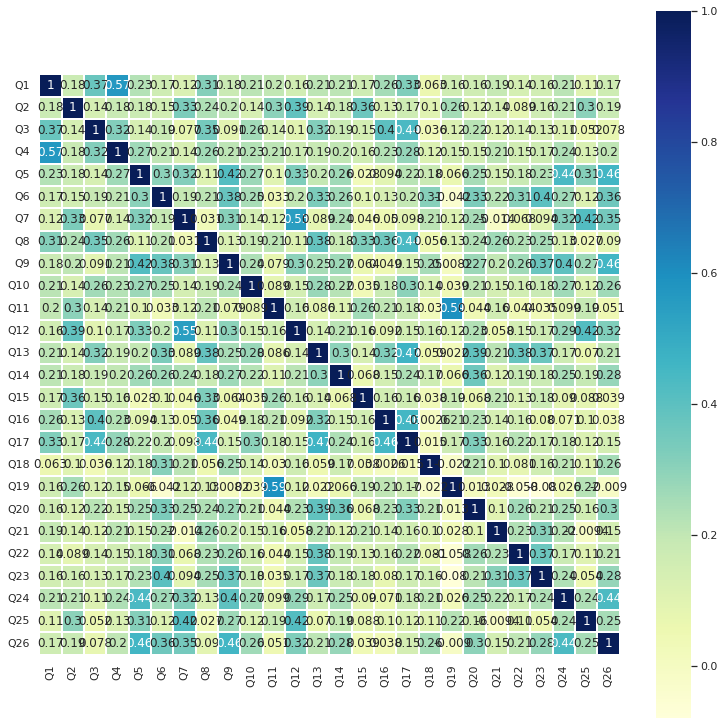

In [ ]:
plt.figure(figsize=(13,13))
sns.heatmap(corr,square=True,
            vmin=low,
            vmax=high,
            cmap='YlGnBu',
           annot=True,
           linewidths=1)

In [ ]:
total_negative_cols = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5',
             'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 
             'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 
             'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
             'Q21', 'Q22', 'Q23', 'Q24', 'Q25',
             'Q26']

In [ ]:
data['mach_score'] = question_data.mean(axis=1)

In [ ]:
data[total_negative_cols] = 6-data[total_negative_cols]

In [ ]:
data.corr(method='spearman')['mach_score'].abs().sort_values(ascending=False)

mach_score      1.000000
Q13             0.542846
Q17             0.533184
Q6              0.511514
Q8              0.510067
                  ...   
surveyelapse    0.025547
familysize      0.023562
voted           0.017646
TIPI3           0.017266
VCL16           0.013330
Name: mach_score, Length: 69, dtype: float64

In [ ]:
data.drop(question_cols,axis=1).corr(method='spearman')['mach_score'].abs().sort_values(ascending=False)


mach_score      1.000000
nerdiness       0.467362
TIPI1           0.288081
TIPI6           0.272661
testelapse      0.209947
orientation     0.206077
VCL3            0.198388
VCL12           0.171253
VCL13           0.170628
TIPI10          0.165569
VCL8            0.151744
VCL14           0.147304
ASD             0.117801
VCL11           0.116969
VCL9            0.115725
TIPI4           0.114971
VCL2            0.113338
VCL6            0.099486
VCL7            0.098812
TIPI2           0.097146
age             0.091731
TIPI8           0.091227
TIPI7           0.090078
VCL5            0.085194
gender          0.079310
TIPI5           0.079126
education       0.073326
TIPI9           0.065935
hand            0.056233
VCL4            0.054742
VCL10           0.050750
VCL15           0.048660
VCL1            0.045458
religion        0.042144
married         0.041112
urban           0.035566
engnat          0.032401
introelapse     0.028854
surveyelapse    0.025547
familysize      0.023562


In [ ]:
train['mach_score']=data.iloc[:split_point]['mach_score']


In [ ]:
train[['mach_score','voted']].corr(method='spearman')

,mach_score,voted
mach_score,1.00000,0.01976
voted,0.01976,1.00000




---



In [ ]:
import numpy as np
import pandas as pd
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train  = pd.read_csv('competition_data/train.csv')
test  = pd.read_csv('competition_data/test.csv')

In [ ]:
train = train.drop(['index', 'country'],axis = 1)
test =test.drop(['index', 'country'],axis = 1)

In [ ]:
#train을 target과 feature로 나눠줍니다.
train_x=train.drop(['nerdiness'], axis=1)
train_y=train['nerdiness']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size= 0.2, random_state=1234)

In [ ]:
lgbm_clf = LGBMClassifier(
            n_estimators=1000
        )
lgbm_clf.fit(X_train, y_train)

lgbm_pred = lgbm_clf.predict(X_test)

In [ ]:
import numpy as np
from sklearn import metrics
fpr, tpr, thresholds= metrics.roc_curve(y_test.values, lgbm_pred, pos_label=1)
metrics.auc(fpr, tpr)

0.765912381000217



---



GridSearch

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, Randomi
from sklearn.metrics import accuracy_score

In [ ]:
iris_data = load_iris()
label = iris_data.target
data = iris_data.data

X_train, X_val, y_train, y_val = train_test_split(data, label, test_size=0.2)

In [ ]:
# GridSearchCV의 param_grid 설정
params = {
    'num_leaves'
}

dtc = DecisionTreeClassifier()

grid_tree = GridSearchCV(dtc, param_grid=params, cv=3, refit=True)
grid_tree.fit(X_train, y_train)

print('best parameters : ', grid_tree.best_params_)
print('best score : ', grid_tree.best_score_)
em = grid_tree.best_estimator_
pred = em.predict(X_val)
accuracy_score(y_val, pred)

best parameters :  {'max_depth': 2, 'min_samples_split': 2}
best score :  0.9499999999999998


0.9666666666666667

AutoMl

In [ ]:
path = 'data/'

In [ ]:
import pandas as pd
train  = pd.read_csv('competition_data/train.csv')
test  = pd.read_csv('competition_data/test.csv')
submission = pd.read_csv('competition_data/sample_submission.csv')

In [ ]:
print(train.shape)
print(test.shape)
print(submission.shape)

(15000, 70)
(35452, 69)
(35452, 2)


In [ ]:
print('train : ',train.isnull().sum())
print('test : ',test.isnull().sum())

train :  index           0
Q1             41
Q2             69
Q3             50
Q4             71
             ... 
voted          85
married        82
familysize    319
ASD            89
nerdiness       0
Length: 70, dtype: int64
test :  index            0
Q1             119
Q2             147
Q3             130
Q4             125
              ... 
orientation    823
voted          181
married        180
familysize     703
ASD            237
Length: 69, dtype: int64


In [ ]:
#labelencoding
label = LabelEncoder()
train['gender_code'] = label.fit_transform(train['gender'])
train['age_group_code'] = label.fit_transform(train['age_group'])
train['race_code'] = label.fit_transform(train['race'])
train['religion_code'] = label.fit_transform(train['religion'])

test['gender_code'] = label.fit_transform(test['gender'])
test['age_group_code'] = label.fit_transform(test['age_group'])
test['race_code'] = label.fit_transform(test['race'])
test['religion_code'] = label.fit_transform(test['religion'])

drop2 = ['gender','age_group','race','religion']
train = train.drop(drop2, axis = 1)
test = test.drop(drop2, axis = 1)

NameError: ignored